In [3]:
### House price prediction

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('housing_price_dataset.csv')
df=pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [6]:
df.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


<Axes: xlabel='Price', ylabel='Count'>

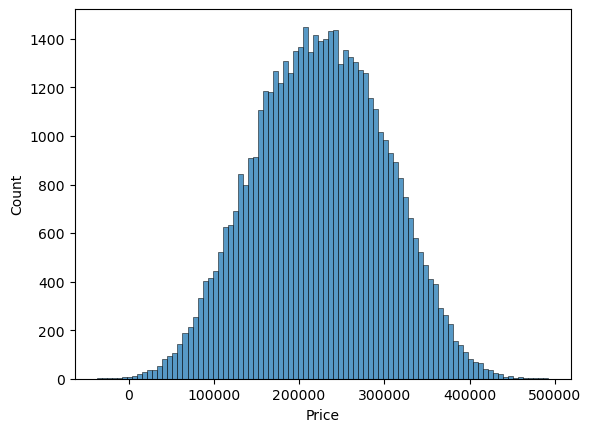

In [7]:
sns.histplot(df['Price'])

<Axes: ylabel='Price'>

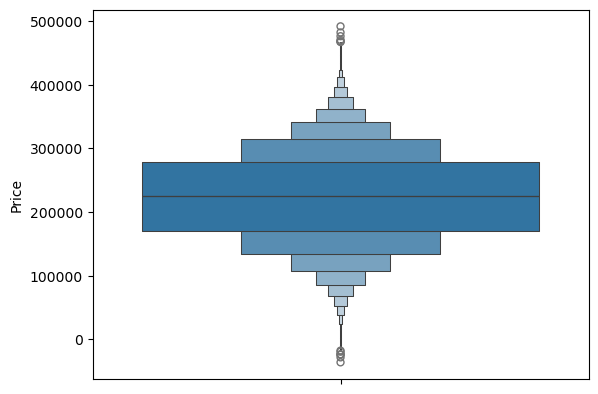

In [8]:
sns.boxenplot(df['Price'])

<Axes: ylabel='Price'>

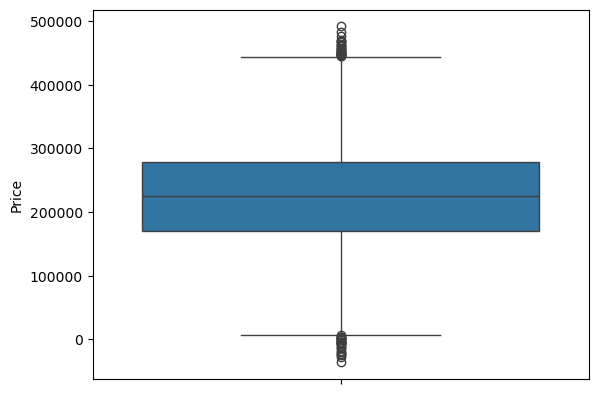

In [9]:
sns.boxplot(df['Price'])

In [10]:
q1=df['Price'].quantile(0.25)

In [11]:
q3=df['Price'].quantile(0.75)

In [12]:
IQR=q3-q1

In [13]:
lower_limit=q1-(1.5*IQR)
upper_limit=q3-(1.5*IQR)

In [14]:
df[df['Price']>upper_limit]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49994,2426,5,2,Urban,1950,331497.091307
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [15]:
df[df['Price']<0]

df['Price']=abs(df['Price'])

<Axes: >

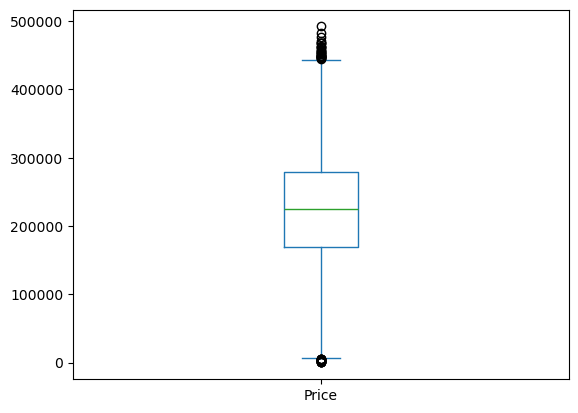

In [16]:
df['Price'].plot(kind='box')

In [17]:
## here price is corrected

In [18]:
df.Bathrooms.unique()

array([1, 2, 3], dtype=int64)

In [19]:
df.Neighborhood.unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [20]:
df.Bedrooms.unique()

array([4, 3, 2, 5], dtype=int64)

In [21]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [22]:
df['Neighborhood']=df.Neighborhood.map({'Rural':0,'Suburb':1,'Urban':2})

In [23]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [24]:
df.YearBuilt.min()

1950

In [25]:
df.YearBuilt.max()

2021

In [26]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [27]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [28]:
X=df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']]
y=df['Price']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)


LinearRegression()

In [32]:
lry=lr.predict(X_test)

In [33]:
from sklearn.metrics import r2_score

r2_score(y_test,lry)

0.570626767041313

In [34]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor()
kn.fit(X_train,y_train)
knyp=kn.predict(X_test)
r2_score(y_test,knyp)

0.48427179056409797

In [35]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dtp=dt.predict(X_test)
r2_score(y_test,dtp)

0.10395529696904215

In [36]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,dtp)

5278517734.919707

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_test,dtp))

print(mean_absolute_percentage_error(y_test,lry))

print(mean_absolute_percentage_error(y_test,knyp))

0.3554482883267355
0.2745908808290777
0.29214017274701465


In [38]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
print(kn.predict([[1282,5,3,0,1975]])-215355.283618)
print(lr.predict([[1282,5,3,0,1975]])-215355.283618)
print(dt.predict([[1282,5,3,0,1975]]))

[-68455.06443949]
[-52758.39185832]
[100080.86589451]


In [41]:
r2_score(y_test,dt.predict(X_test))

0.10395529696904215

In [42]:
r2_score(y_test,lr.predict(X_test))

0.570626767041313

In [43]:
r2_score(y_test,kn.predict(X_test))

0.48427179056409797

In [44]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,dt.predict(X_test)))

print(mean_absolute_error(y_test,lr.predict(X_test)))

print(mean_absolute_error(y_test,kn.predict(X_test)))

mean_absolute_error(y_test,lr.predict(X_test))


58046.8107154593
40223.821923826035
44182.48667850275


40223.821923826035

In [45]:
import pickle

pickle.dump(lr,open('lr.pkl','wb'))
pickle.dump(dt,open('dt.pkl','wb'))
pickle.dump(kn,open('kn.pkl','wb'))

In [46]:
dtest=pd.merge(X_test,y_test, left_index=True, right_index=True)

In [47]:
dtest

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
18991,1572,5,1,0,2007,156943.906601
41632,1532,4,2,0,2014,271308.869122
36306,1464,3,3,0,1965,207169.325745
26881,2734,3,2,2,2011,321676.061172
3469,2583,3,3,1,1954,303031.169823
...,...,...,...,...,...,...
21891,1756,5,1,1,2005,171780.088243
30293,2003,2,1,2,2001,275719.987180
16920,2471,3,2,2,1953,356294.066291
26053,1970,4,2,0,1961,121219.751102


In [48]:
dt.predict([[2583,3,3,1,1954]])-303031.169823

array([25986.00197744])

In [49]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [50]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,1985.404420,224838.070900
std,575.513241,1.116326,0.815851,0.815838,20.719377,76110.105518
min,1000.000000,2.000000,1.000000,0.000000,1950.000000,154.779120
25%,1513.000000,3.000000,1.000000,0.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,2021.000000,492195.259972


In [51]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957
